In [1]:
import splat
import splat.empirical as spe
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import popsims
%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
x, y=spe.typeToTeff(20, ref='mamajek')

In [3]:
from popsims.relations import LITERATURE_POLYNOMIALS

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


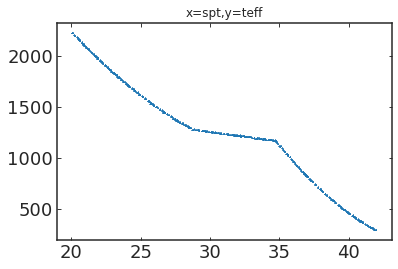

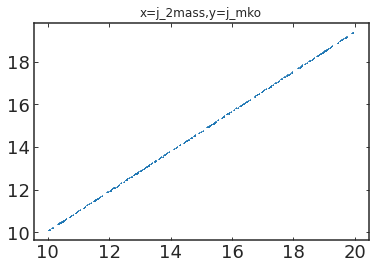

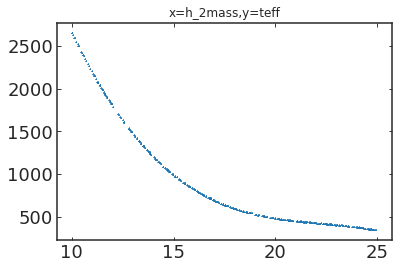

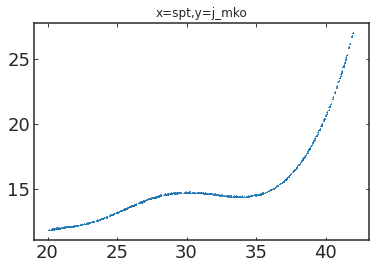

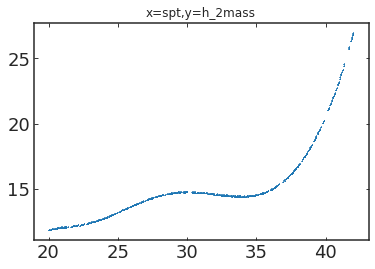

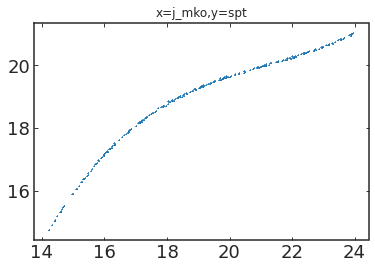

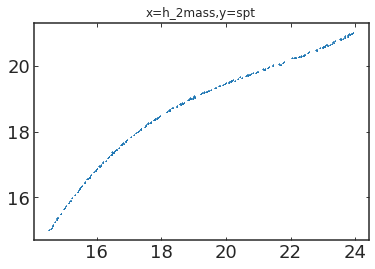

In [4]:
for k in LITERATURE_POLYNOMIALS['kirkpatrick2021']:
    pol= LITERATURE_POLYNOMIALS['kirkpatrick2021'][k]
    
    xs= np.random.uniform(10, 45, 1000)
    ys=popsims.tools.apply_polynomial_relation(pol, xs, xerr=0.0, nsample=1000)
    
    fig, ax=plt.subplots()
    ax.scatter(xs, ys[0], s=1, marker='+')
    ax.set(title=k)
    

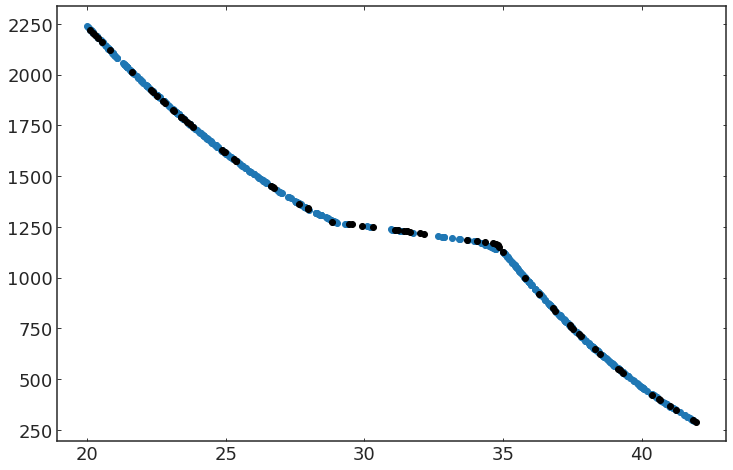

In [5]:

xs= np.random.uniform(10, 42, 100)
xerr= np.ones_like(xs)*1e-4
y, unc=popsims.tools.apply_polynomial_relation(LITERATURE_POLYNOMIALS['kirkpatrick2021']['x=spt,y=teff'], xs, xerr=xerr,  nsample=10000)


ys=np.random.uniform(100, 4000, 1000)
xgrid=np.arange(20, 43)
x=popsims.tools.inverse_polynomial_relation(LITERATURE_POLYNOMIALS['kirkpatrick2021']['x=spt,y=teff'], ys, xgrid, nsample=10000)


fig, ax=plt.subplots(figsize=(12, 8))
ax.scatter(x[0], ys, label='inverse relation')
ax.scatter(xs, y,   c='k',  label='relation')

In [6]:
d=popsims.make_systems(nsample=int(1e6))

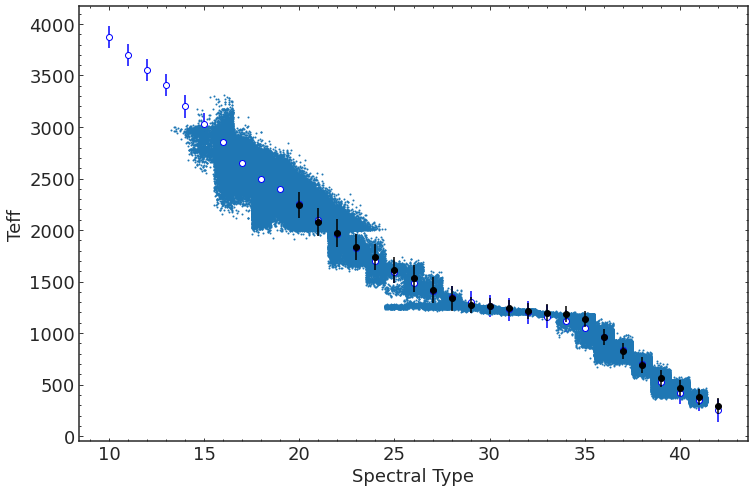

In [7]:
fig, ax=plt.subplots(figsize=(12, 8))
for a in np.arange(10, 43):
    ab=popsims.relations.spt_to_teff_kirkpatrick(a)
    ax.errorbar(a, ab[0], yerr=ab[-1], marker='o', c='k')
    
    ab_m=spe.typeToTeff(float(a), ref='mamajek')
    
    ax.errorbar(a, ab_m[0].value, yerr=ab_m[-1].value, marker='o', color='blue', \
                mfc='white', zorder=1)
    
    ax.set(xlabel='Spectral Type', ylabel='Teff')
    ax.minorticks_on()

#teffs=np.random.uniform(100, 4000, 10_0000)
ax.scatter( d.prim_spt, d.temperature, s=1)

In [8]:
def teff_to_spt_kirkpatrick(teff):
    tgrid=np.linspace(0, 3000, 5000)
    return popsims.tools.inverse_polynomial_relation(LITERATURE_POLYNOMIALS['kirkpatrick2021']['x=spt,y=teff'], teff, tgrid, \
        nsample=1000)

In [9]:
x=popsims.simulate_spts(nsample=int(1e4), model_name='baraffe2003')

In [10]:
t=x['sing_evol']['temperature'].value

In [11]:
v=teff_to_spt_kirkpatrick(t)[0]

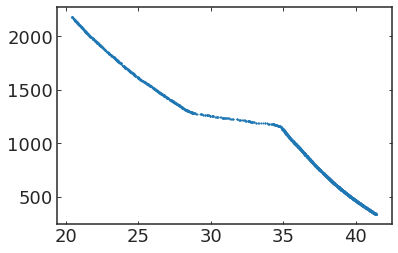

In [12]:
fig, ax=plt.subplots()
ax.scatter(v, t, s=1)